In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


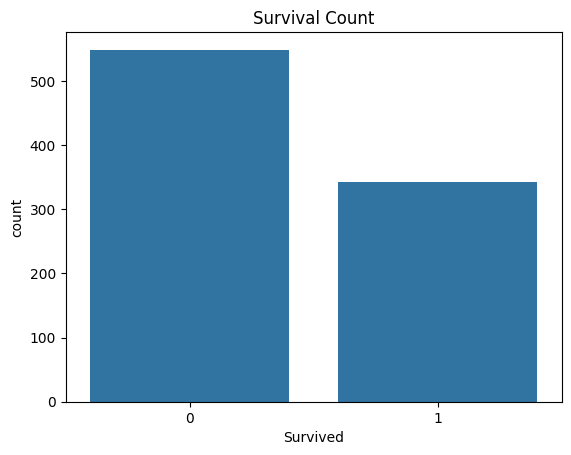

In [9]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

📌 Insight:

- More passengers did not survive

- Dataset is imbalanced

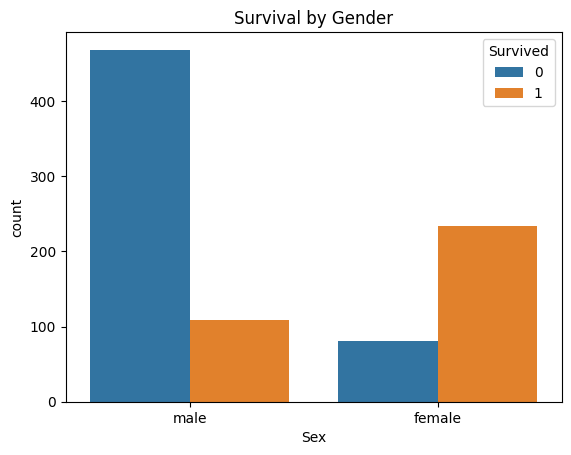

In [10]:
# Categorical Feature Analysis

# Survival VS Gender

sns.countplot(x='Sex', hue='Survived', data = df)
plt.title("Survival by Gender")
plt.show()

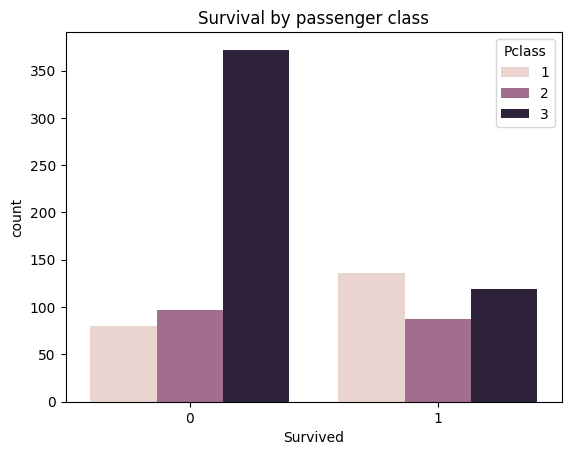

In [12]:
# Survival VS Passenger Class

sns.countplot(x='Survived', hue='Pclass', data = df)
plt.title("Survival by passenger class")
plt.show()

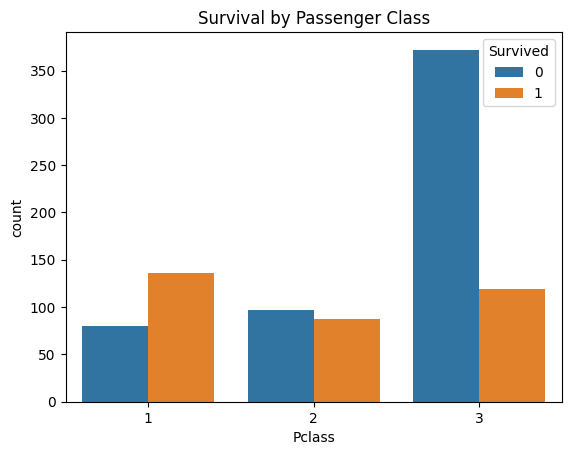

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()


📌 Key Insight:

- 1st class passengers had higher survival rates

- 3rd class had lowest

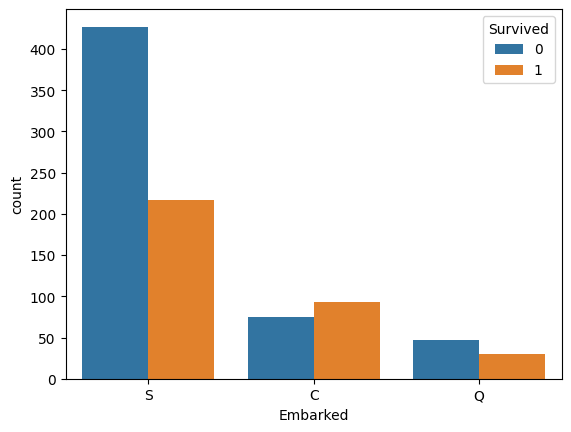

In [14]:
# Survival vs Embarked

sns.countplot(x='Embarked', hue='Survived', data = df)
plt.show()

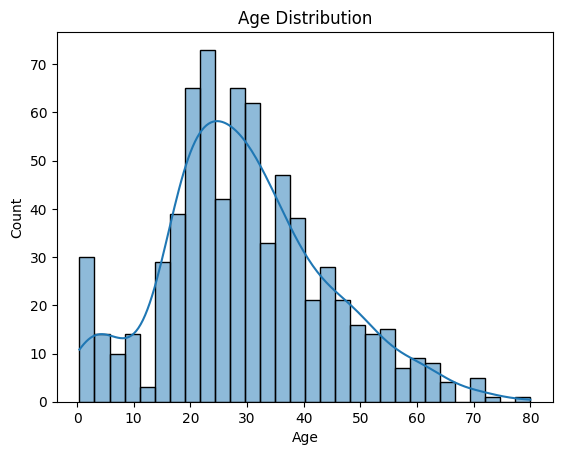

In [15]:
# Numerical Feature Analysis

# Age Distribution

sns.histplot(df['Age'], bins = 30, kde = True)
plt.title("Age Distribution")
plt.show()

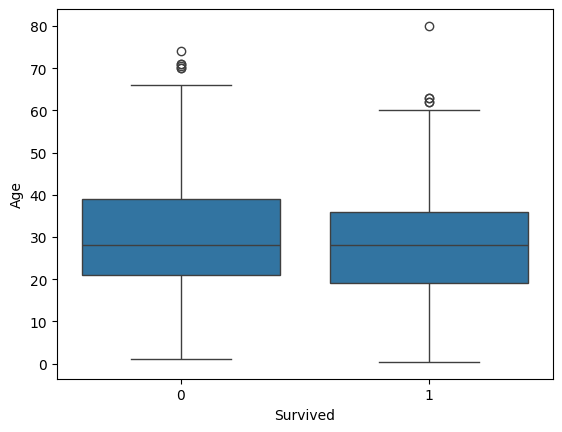

In [17]:
# Age vs Survival

sns.boxplot(x='Survived', y='Age', data = df)
plt.show()

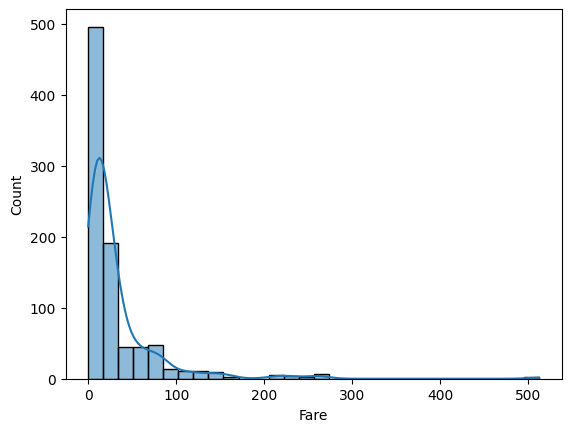

In [18]:
# Face Distribution

sns.histplot(df['Fare'], bins = 30, kde = True)
plt.show()

📌 Insight:

- Fare is right-skewed

- Higher fare → higher survival probability

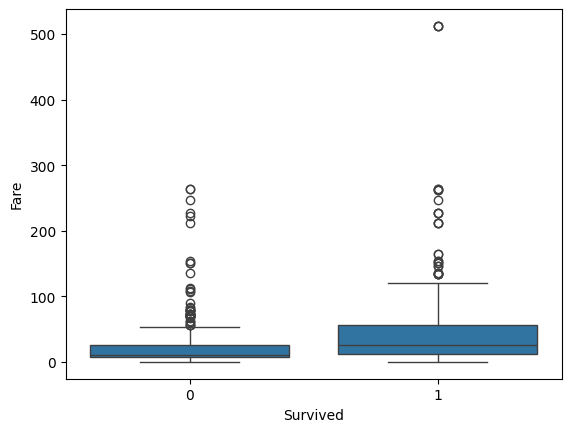

In [19]:
# Fare vs Survival

sns.boxplot(x = 'Survived', y = 'Fare', data = df)
plt.show()

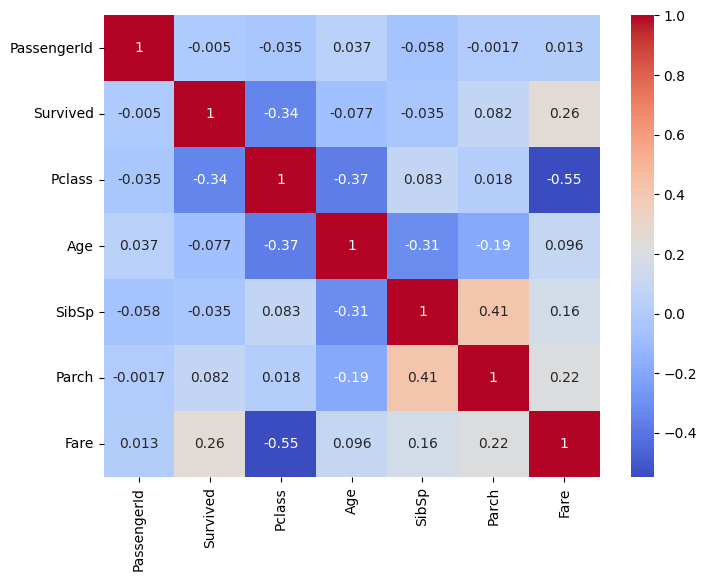

In [20]:
# Correlation Analysis

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


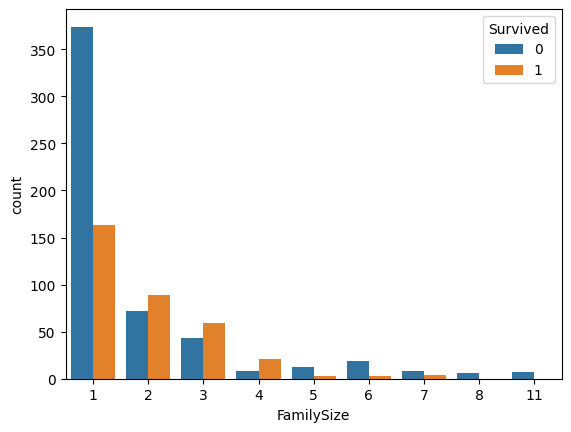

In [21]:
# Feature Engineering

# Create Family Size

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.countplot(x = 'FamilySize', hue = 'Survived', data = df)
plt.show()

📌 Insight:

- Small families (2–4) survived more

- Large families had lower survival

## EDA Conclusions
- Female passengers had a significantly higher survival rate

- First-class passengers were more likely to survive

- Younger passengers had better survival chances

- Higher fare correlated positively with survival

- Passengers with small families survived more

In [22]:
# Handling Missing Values

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [24]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'].head()

/tmp/ipython-input-2479688840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


📌 Why median?

- Age is skewed

- Median handles outliers better than mean

In [25]:
df['Embarked'].value_counts()


,count
Embarked,
S,644
C,168
Q,77


In [26]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-411043493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [27]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)
df.drop(columns=['Cabin'], inplace=True)


In [28]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [29]:
df.select_dtypes(include='object').columns


Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [30]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [31]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [32]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-244649040.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [33]:
df['Title'] = df['Title'].replace(
    ['Lady','Countess','Capt','Col','Don','Dr','Major',
     'Rev','Sir','Jonkheer','Dona'], 'Rare'
)

df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})


In [34]:
df['Title'] = df['Title'].map({
    'Mr': 1,
    'Miss': 2,
    'Mrs': 3,
    'Master': 4,
    'Rare': 5
})


In [35]:
df.drop(columns=['Name'], inplace=True)


In [36]:
df.drop(columns=['Ticket'], inplace=True)


In [37]:
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,HasCabin,Embarked_Q,Embarked_S,Title
0,1,0,3,0,22.0,1,0,7.2500,2,0,False,True,1
1,2,1,1,1,38.0,1,0,71.2833,2,1,False,False,3
2,3,1,3,1,26.0,0,0,7.9250,1,0,False,True,2
3,4,1,1,1,35.0,1,0,53.1000,2,1,False,True,3
4,5,0,3,0,35.0,0,0,8.0500,1,0,False,True,1


I handled missing values using median imputation for Age, mode for Embarked, and removed Cabin due to excessive missing data.
I encoded categorical variables using label encoding for binary features and one-hot encoding for multi-class features.
I also performed feature engineering by extracting passenger titles from names, which improved model interpretability

In [38]:
df[['Embarked_Q', 'Embarked_S']] = df[['Embarked_Q', 'Embarked_S']].astype(int)


In [39]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,HasCabin,Embarked_Q,Embarked_S,Title
0,1,0,3,0,22.0,1,0,7.2500,2,0,0,1,1
1,2,1,1,1,38.0,1,0,71.2833,2,1,0,0,3
2,3,1,3,1,26.0,0,0,7.9250,1,0,0,1,2
3,4,1,1,1,35.0,1,0,53.1000,2,1,0,1,3
4,5,0,3,0,35.0,0,0,8.0500,1,0,0,1,1


After one-hot encoding, some categorical features were created as boolean values.
I converted them into integer format (0/1) to ensure compatibility with machine learning algorithms

In [40]:
# Separate Features and Target

X = df.drop('Survived', axis=1)
y = df['Survived']

# GridSearchCV

In [41]:
from sklearn.svm import SVC

In [42]:
model = SVC()

In [43]:
# Hyper Parameters

parameters = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [1, 5, 10, 20]
}

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [45]:
# Grid Search

classifier = GridSearchCV(model, parameters, cv = 5)

In [46]:
classifier.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [47]:
classifier.cv_results_

{'mean_fit_time': array([1.80506679e+01, 1.67943001e-02, 1.39362812e-02, 1.31849289e-02,
        2.28541510e+01, 2.66626835e-02, 1.37691498e-02, 1.17829800e-02,
        3.00201468e+01, 3.26351643e-02, 1.40215874e-02, 1.17966652e-02,
        2.37356626e+01, 8.44790936e-02, 1.57487869e-02, 1.30204201e-02]),
 'std_fit_time': array([4.88017007e+00, 1.69140259e-03, 2.79422181e-04, 3.51876022e-04,
        9.72046650e+00, 3.08506695e-03, 3.12207067e-04, 1.63517995e-04,
        5.25454978e+00, 5.76045272e-03, 5.04870702e-04, 2.13988473e-04,
        1.24919621e+01, 1.43432505e-02, 7.44575602e-04, 1.15292657e-03]),
 'mean_score_time': array([0.00349402, 0.00410552, 0.00584545, 0.00470247, 0.00303383,
        0.00350461, 0.00516772, 0.00398769, 0.00317311, 0.00341697,
        0.00525198, 0.00403929, 0.00314622, 0.00559673, 0.00628815,
        0.00465031]),
 'std_score_time': array([6.31634382e-04, 2.39154510e-04, 1.03592321e-04, 1.46674800e-04,
        5.04948879e-04, 1.25944023e-04, 9.27760187e-

In [48]:
# Best Parameters

best_para = classifier.best_params_
print(best_para)

{'C': 1, 'kernel': 'linear'}


In [49]:
# Highest Accuracy

high_acc = classifier.best_score_
print(high_acc)

0.8069549934090766


In [51]:
# Loading the results to pandas dataframe

results = pd.DataFrame(classifier.cv_results_)

In [52]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,18.050668,4.880170,0.003494,0.000632,1,linear,"{'C': 1, 'kernel': 'linear'}",0.810056,0.814607,0.797753,0.792135,0.820225,0.806955,0.010474,1
1,0.016794,0.001691,0.004106,0.000239,1,poly,"{'C': 1, 'kernel': 'poly'}",0.614525,0.629213,0.606742,0.668539,0.691011,0.642006,0.032459,11
2,0.013936,0.000279,0.005845,0.000104,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.614525,0.640449,0.646067,0.640449,0.651685,0.638635,0.012755,12
3,0.013185,0.000352,0.004702,0.000147,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.614525,0.617978,0.617978,0.376404,0.612360,0.567849,0.095746,16
4,22.854151,9.720467,0.003034,0.000505,5,linear,"{'C': 5, 'kernel': 'linear'}",0.793296,0.792135,0.780899,0.814607,0.837079,0.803603,0.019975,3


acuuracy : 80.6 %

After feature engineering and scaling, the data showed strong linear separability, making a linear SVM the best-performing model.

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


📌 Important Rule
Always split before scaling to avoid data leakage.

In [55]:
from sklearn.preprocessing import StandardScaler


In [56]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [58]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


In [59]:
X_train_scaled.describe()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,HasCabin,Embarked_Q,Embarked_S,Title
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,712.000000,7.120000e+02
mean,8.482603e-17,9.355812e-17,9.979533e-18,1.746418e-17,1.746418e-17,2.245395e-17,5.363999e-17,-4.989766e-17,1.247442e-17,1.871162e-18,0.000000,1.097749e-16
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703,1.000703e+00
min,-1.743257e+00,-1.614136e+00,-7.243102e-01,-2.214363e+00,-4.707224e-01,-4.793416e-01,-6.274674e-01,-5.546661e-01,-5.362113e-01,-3.033555e-01,-1.687794,-6.975462e-01
25%,-8.711114e-01,-4.005512e-01,-7.243102e-01,-5.542135e-01,-4.707224e-01,-4.793416e-01,-4.748670e-01,-5.546661e-01,-5.362113e-01,-3.033555e-01,-1.687794,-6.975462e-01
50%,2.052398e-02,8.130337e-01,-7.243102e-01,-9.263364e-02,-4.707224e-01,-4.793416e-01,-3.491435e-01,-5.546661e-01,-5.362113e-01,-3.033555e-01,0.592489,-6.975462e-01
75%,8.780530e-01,8.130337e-01,1.380624e+00,4.458762e-01,3.799232e-01,-4.793416e-01,-4.017244e-02,4.009635e-02,-5.362113e-01,-3.033555e-01,0.592489,2.820453e-01
max,1.725837e+00,8.130337e-01,1.380624e+00,3.907725e+00,6.334442e+00,7.104908e+00,9.237724e+00,5.392959e+00,1.864936e+00,3.296463e+00,0.592489,3.220820e+00


I applied feature scaling using StandardScaler after performing a train-test split.
The scaler was fitted only on the training data to prevent data leakage, and then applied to the test data.

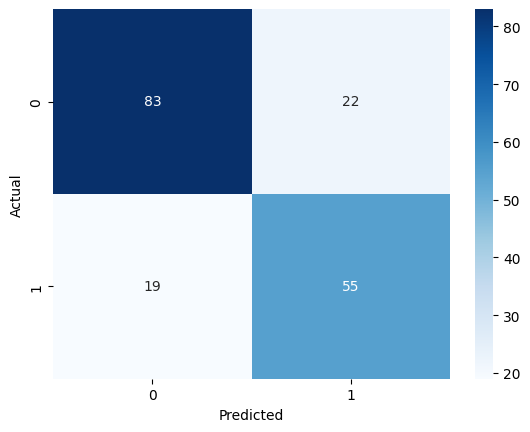

In [60]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.best_estimator_.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [61]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.79      0.80       105
           1       0.71      0.74      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179



In [62]:
svc = SVC(
    kernel='linear',
    C=1,
    class_weight='balanced'
)
svc.fit(X_train_scaled, y_train)

y_pred_bal = svc.predict(X_test_scaled)
print(classification_report(y_test, y_pred_bal))


              precision    recall  f1-score   support

           0       0.84      0.81      0.83       105
           1       0.74      0.78      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.80      0.80      0.80       179

